In [3]:
x,y,z=3,2,4


In [5]:
x

3

In [6]:
y

2

Homogeneous transformation

In [20]:
#!usr/bin/env python

from sympy import symbols, cos, sin, pi, simplify, sqrt, atan2
from sympy.matrices import Matrix

###############################################################
# Problem Statement:
  # Let P be a vector expressed in frame {B} with (x,y,z)
  # coordinates = (15.0, 0.0, 42.0)
  # Rotate P about the Y-axis by angle = 110 degrees. 
  # Then translate the vector 1 unit
  # in the X-axis and 30 units in the Z-axis. 
  # Print the new (x, y, z) coordinates of P after the transformation.  
###############################################################
#### Create symbols for joint variables
q1 = symbols('q1')
gamma  = symbols('gamma')
##Rotation matrix
dtr=pi/180

##Given co-ordinates
x,y,z=15.0, 0.0, 42.0
#### TO DO ####
# Replace P and T with appropriate expressions and calculate new coordinates of P in {A}. 
P = Matrix([x,y,z,1])     # P should be a 4x1 Matrix
T = Matrix([[cos(q1),  0, sin(q1),  2],
            [0,        1,       0,  0],
            [-sin(q1), 0, cos(q1), 30],
            [0,        0,      0,   1]])     # T Should be a 4x4 homogeneous Transform
P_new = simplify(T*P) # 
# Evaluate numerically
print("The new coordinates of P_A are :", P_new.evalf(subs={q1: 110*dtr}))

The new coordinates of P_A are : Matrix([[36.3367879231231], [0], [1.53976466853329], [1.00000000000000]])


In [17]:
size(R_y)

NameError: name 'size' is not defined

In [14]:
from sympy import symbols, cos, sin, pi, simplify, sqrt, atan2
from sympy.matrices import Matrix
x=Matrix([2, 3, 4])
x

Matrix([
[2],
[3],
[4]])

Translation followed by rotation



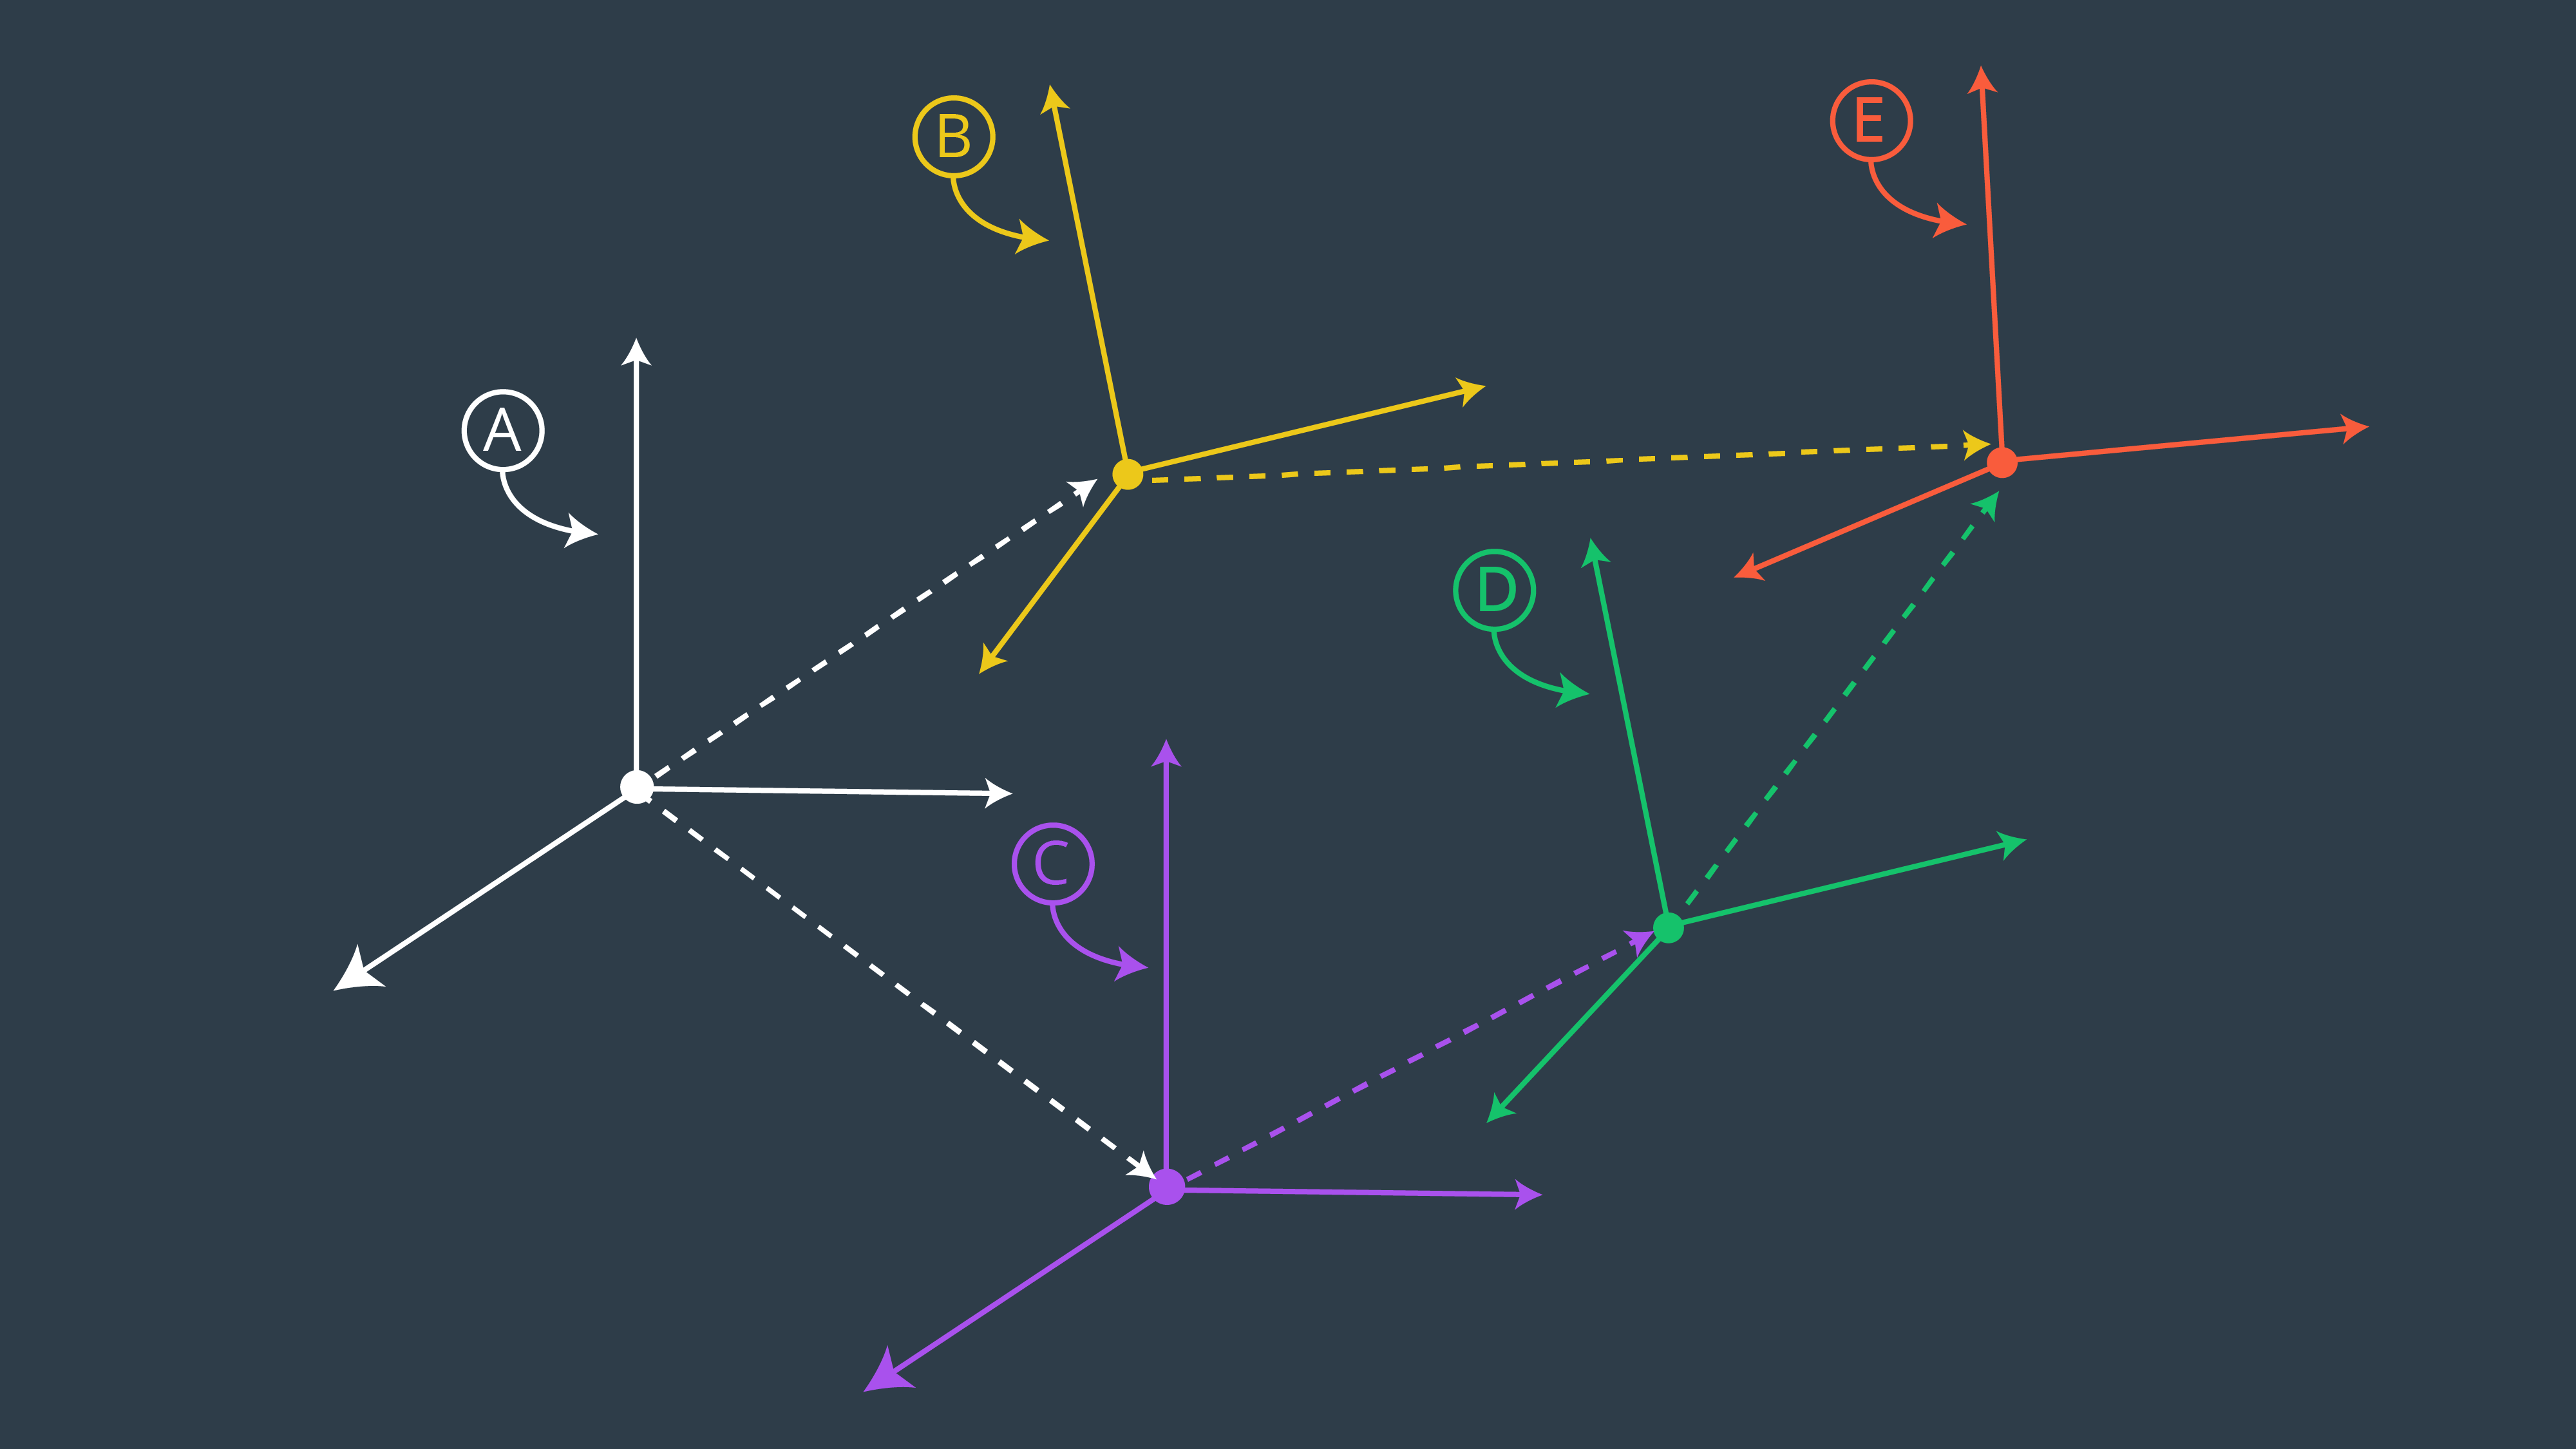

From Frame A to B to E:

Frame A: Located at [0, 0, 0]
Frame B: Rotate Frame A about a_y by -90 degrees. Translate A by [-2, 2, 4]
Frame E: Rotate Frame B about b_x by 90 degrees. Translate B by [0, 2, 0]
From Frame A to C to D to E:

Frame C: Translate A by [4, 4, 0]
Frame D: Rotate Frame C about c_x by 90 degrees. Translate C by [-3, 3, 2]
Frame E: Rotate Frame D about d_Z by 90 degrees. Translate D by [-3, 2, 3]

In [6]:
#!/usr/bin/env python

from sympy import symbols, cos, sin, pi, sqrt, simplify
from sympy.matrices import Matrix

### Create symbols for joint variables
# The numbers 1 to 4 correspond to each rotation in the order specified to you.
q1, q2, q3, q4 = symbols('q1:5')

### Define functions for Rotation Matrices about x, y, and z given specific angle.

def rot_x(q):
    R_x = Matrix([[1,        0,        0],
                 [0,   cos(q),  -sin(q)],
                 [0,   sin(q),   cos(q)]])
    
    return R_x
    
def rot_y(q):
    R_y = Matrix([[cos(q),        0,       sin(q)],
                 [0,             1,            0],
                 [-sin(q),       0,       cos(q)]])
    
    return R_y

def rot_z(q): 
    R_z = Matrix([[cos(q),   -sin(q),           0],
                 [-sin(q),   cos(q),           0],
                 [      0,        0,           1]])
    
    return R_z
              
### Define rotations between frames

# Initial Rotation Matrix for Frame A
Ra = Matrix([[1, 0, 0],
             [0, 1, 0],
             [0, 0, 1]])

# Rotations performed on individual Frames for A->B->E
Rb_a = Ra* rot_y(q1)
Re_b = Rb_a*rot_x(q2)

# Rotations performed on individual Frames for A->C->D->E
Rc_a = Ra
Rd_c = Rc_a*rot_x(q3)
Re_d = Rd_c*rot_z(q4)

### Define Translations between frames.

tb_a = Matrix([[-2],[2],[4]])
te_b = Matrix([[0],[2],[0]])
tc_a = Matrix([[4],[4],[0]])
td_c = Matrix([[-3],[3],[2]])
te_d = Matrix([[-3],[2],[3]])

### Define homogenous transformation matrices
# HINT: Check out sympy's documentation for functions row_join and col_join
Ta = Ra.row_join(Matrix([[0],[0],[0]]))
Ta = Ta.col_join(Matrix([[0,0,0,1]]))

Tb_a = Rb_a.row_join(tb_a)
Tb_a = Tb_a.col_join(Matrix([[0,0,0,1]]))

Te_b = Re_b.row_join(te_b)
Te_b = Te_b.col_join(Matrix([[0,0,0,1]]))

Tc_a = Rc_a.row_join(tc_a)
Tc_a = Tc_a.col_join(Matrix([[0,0,0,1]]))

Td_c = Rd_c.row_join(td_c)
Td_c = Td_c.col_join(Matrix([[0,0,0,1]]))

Te_d = Re_d.row_join(te_d)
Te_d = Te_d.col_join(Matrix([[0,0,0,1]]))        

### Composition of Transformations
Te_a_1 = simplify(Ta * Tb_a * Te_b)

Te_a_2 = simplify(Ta * Tc_a * Td_c * Te_d)

### Calculate orientation and position for E
E_1 = Te_a_1.evalf(subs={q1: -pi/2, q2: pi/2}, chop = True)

E_2 = Te_a_2.evalf(subs={q3: pi/2, q4: pi/2}, chop = True)

print("Transformation Matrix for A->B->E:")
print(E_1)

print("Transformation Matrix for A->C->D->E:")
print(E_2)

Transformation Matrix for A->B->E:
Matrix([[-1.00000000000000, 0, 0, -2.00000000000000], [0, 0, -1.00000000000000, 4.00000000000000], [0, -1.00000000000000, 0, 4.00000000000000], [0, 0, 0, 1.00000000000000]])
Transformation Matrix for A->C->D->E:
Matrix([[0, -1.00000000000000, 0, -2.00000000000000], [1.00000000000000, 0, 0, 4.00000000000000], [0, 0, -1.00000000000000, 4.00000000000000], [0, 0, 0, 1.00000000000000]])
